In [ ]:
1. Load the dataset using pandas and explore the various features of the dataset
2. Plot chart of the labels values
3. Create a heatmap of different features from the dataset.

In [14]:
from sklearn.model_selection import train_test_split

In [218]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import dabl 
import matplotlib.pyplot as plt
import dc_stat_think as dcst

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.Outcome.unique()

array([1, 0])

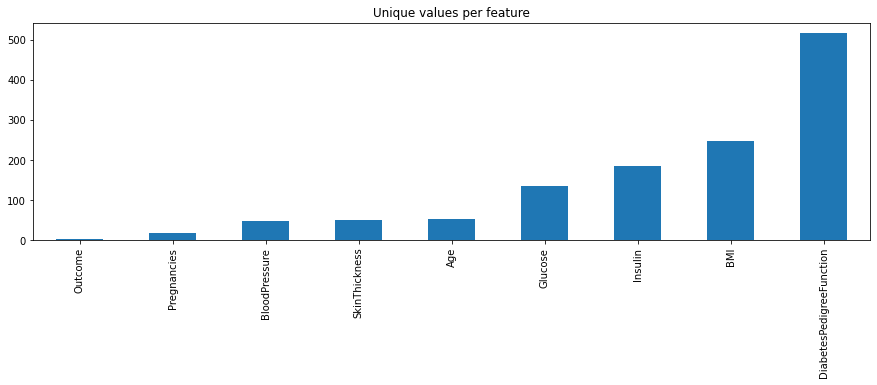

In [5]:
# find number of unique entries for each features
unique_values = df.nunique().sort_values()
# select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")
plt.show()

Target looks like classification


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column Insulin.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column SkinThickness.
  warn("Dropped {} outliers in column {}.".format(


Linear Discriminant Analysis training set score: 0.737


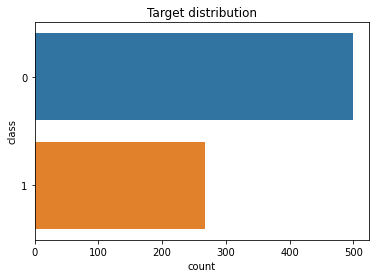

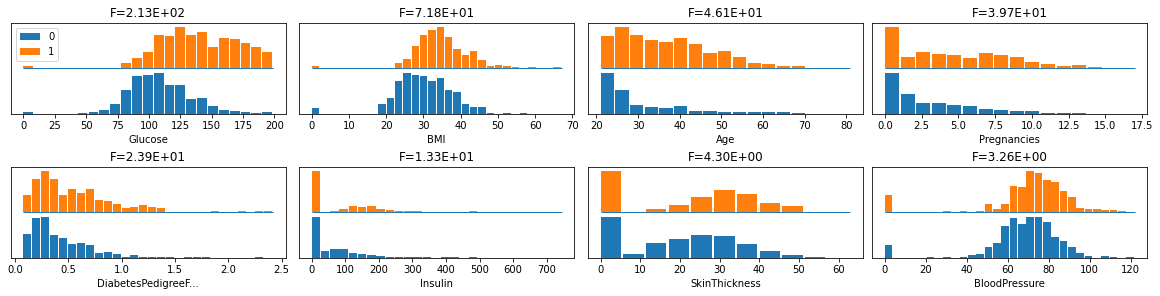

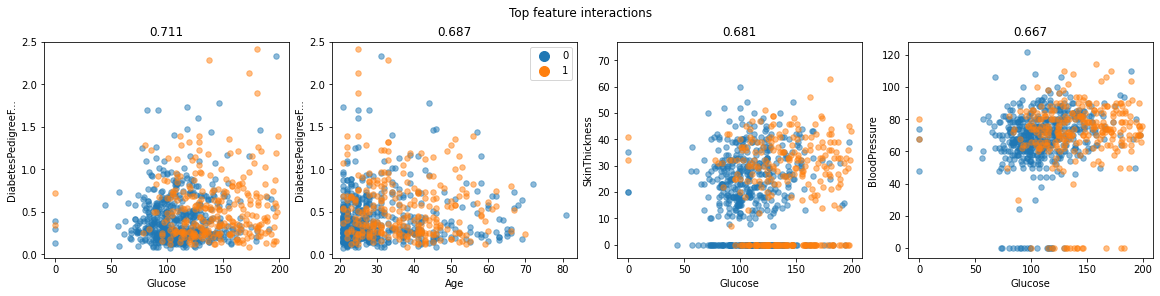

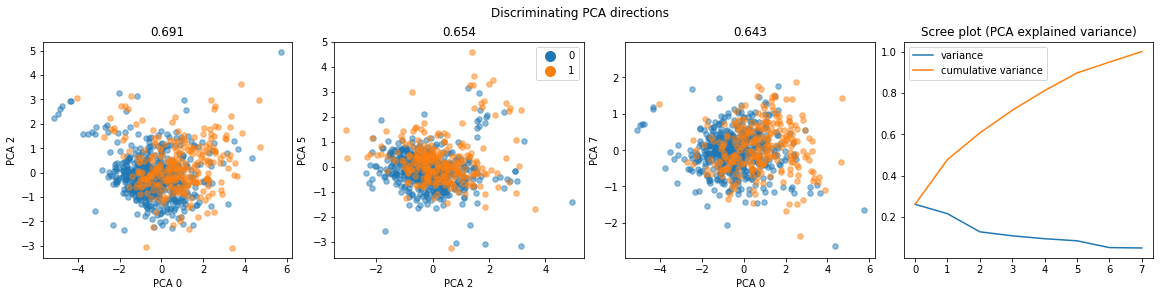

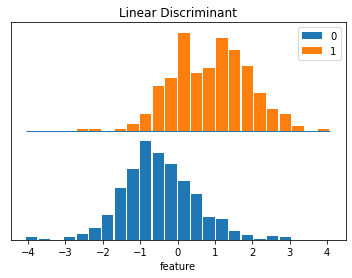

In [6]:
dabl.plot(df, target_col = 'Outcome')
plt.show()

## part 2
1. Build ANN models with 3 layers, 4 layers, and 5 layers, and note the accuracies.
2. Split the test set into 30%, 40%, and 10% and build the model.
3. Build a model with and without Dropout and BatchNorm and check the
difference inaccuracies.
4. Check the change inaccuracies for when the “NaN” in the data frame is
replaced by “0”, mean, and when completely removed.
5. Train the model with any 3 different batch sizes and check the
accuracies.
6. Train models for 10, 50, 100 , 200 epocs.


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
missing = [df.isnull().sum(),100 * df.isnull().mean()]
m = pd.DataFrame(missing)
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head()

,count,%
Pregnancies,0.0,0.0
Glucose,0.0,0.0
BloodPressure,0.0,0.0
SkinThickness,0.0,0.0
Insulin,0.0,0.0


In [21]:
Y = df.Outcome

X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [29]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [30]:
estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-30-0f0f5e6600cd>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


Baseline: 72.80% (4.79%)


In [ ]:
# trying 3 layers 

In [32]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [33]:
estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-33-b1f2bae3f46b>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)


Baseline: 64.71% (3.48%)


In [34]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-34-5221d3f63a7d>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)


Baseline: 64.46% (3.39%)


In [ ]:
# increase epochs 

In [37]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-37-f0780a64548e>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)


Baseline: 68.10% (2.98%)


In [38]:

## trying 100 epochs on 3 layers 
estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-38-edac56d332fb>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


Baseline: 73.69% (2.36%)


In [39]:

## trying 100 epochs on 3 layers 
estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-39-5f82ec97f4fb>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


Baseline: 72.53% (2.59%)


## changing n_splits result
- 100 epochs on 10 splits had lower score than 100 epochs on 5 splits

## adding dropout layer to model 

In [221]:
## adding dropout layer 

def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,input_dim=10,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,input_dim=64,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-221-111e0489187c>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)


Baseline: 66.28% (0.97%)


In [212]:

## trying 100 epochs on 3 layers 
estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-212-edac56d332fb>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


Baseline: 68.23% (2.23%)


In [222]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=45)

In [216]:
estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)

In [217]:
y_pred = estimator.predict(X_test)

In [220]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.81       154
           1       0.68      0.30      0.41        77

    accuracy                           0.72       231
   macro avg       0.70      0.61      0.61       231
weighted avg       0.71      0.72      0.68       231



In [223]:
with more layers /larger layers and drop out 

SyntaxError: invalid syntax (<ipython-input-223-90179c40f83b>, line 1)

In [224]:
estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       154
           1       0.61      0.55      0.58        77

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.73      0.73      0.73       231

